<a href="https://colab.research.google.com/github/TosinFrancis/GDP/blob/main/MALL_CUSTOMER_UNSUPERVISED_LEARNINIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
frame = pd.read_csv('/content/Mall_Customers.csv')
frame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
frame.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# - Rename the features for ease of reference
frame = frame.rename(columns = {'Spending Score (1-100)': 'Score', 'Annual Income (k$)': 'Income', 'CustomerID': 'ID'})
frame.head(2)

,ID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
# Standard Scale the Numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = frame[['Age', 'Income', 'Score']]
for i in x.columns:
  x[[i]] = scaler.fit_transform(x[[i]])

x.head()

,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


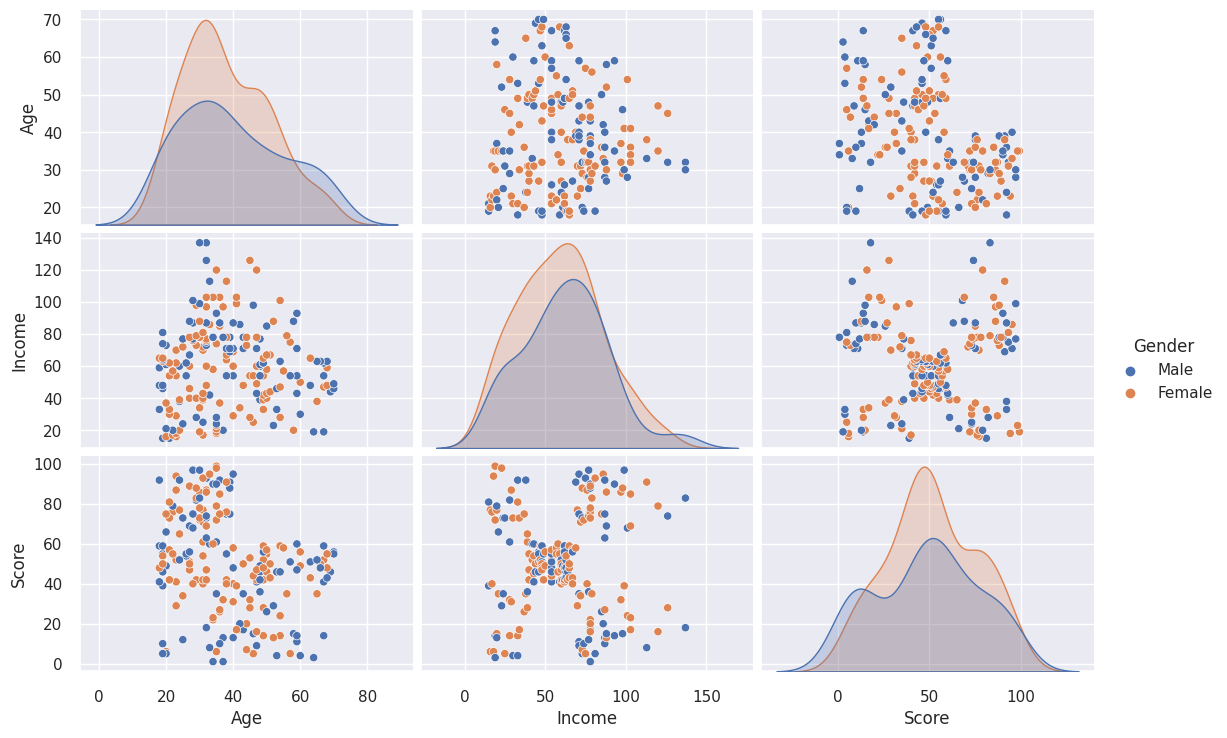

In [ ]:
sns.set(style = 'darkgrid')
sns.pairplot(frame.drop(['ID'], axis = 1), hue='Gender', aspect=1.5)
plt.show()

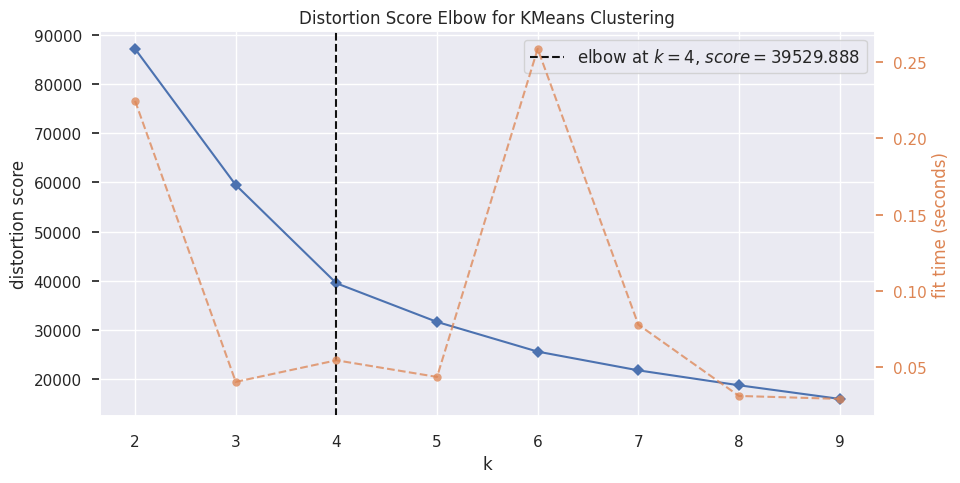

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#install yellowbrick to vizualize the Elbow curve
!pip install yellowbrick  --q

from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm
from yellowbrick.cluster import KElbowVisualizer # ----------------------------- Instantiate the plotting library

x = frame[['Age', 'Income']]

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 5))
visualizer.fit(x) #............................................................. Fit the data to the visualizer
visualizer.show() #............................................................. Finalize and render the figure

In [ ]:
kmeans_5= KMeans(n_clusters = 5).fit(x) # ..................................... Fit Kmeans Algorthm on the Data Subset
X = x.values
k_means_label = kmeans_5.labels_
print(f"KMeans algortihm labels: {kmeans_5.labels_}\n\n") # ............................................. Instantiate the labels of the model
print(f"cluster centers: {kmeans_5.cluster_centers_}")

KMeans algortihm labels: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 3
 3 3 1 4 1 4 1 4 1 4 1 1 1 4 1 1 4 4 4 4 4 1 4 4 1 4 4 4 1 4 4 1 1 4 4 4 4
 4 1 4 1 1 4 4 1 4 4 1 4 4 1 1 4 4 1 4 1 1 1 4 1 4 1 1 4 4 1 4 1 4 4 4 4 4
 1 2 1 1 1 4 4 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


cluster centers: [[ 37.54545455 108.18181818]
 [ 25.73529412  52.41176471]
 [ 35.65517241  77.53448276]
 [ 33.86486486  23.72972973]
 [ 56.08163265  52.55102041]]


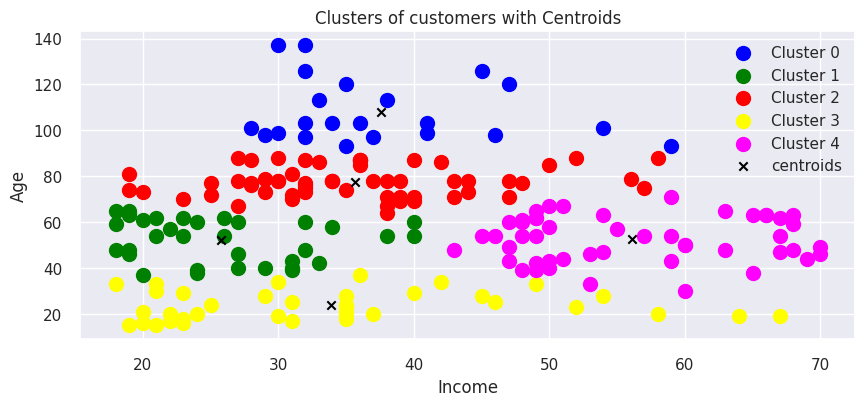

In [ ]:
# Plot the dataset using the model labelling to colour code them
plt.figure(figsize=(10, 4))
sns.set(style='darkgrid')

#plt.scatter(x = X[:, 0], y = X[:, 1], c = kmeans_4.labels_, cmap = 'rainbow')
#plt.scatter(x = kmeans_.4cluster_centers_[:, 0], y = kmeans_5.cluster_centers_[:, 1], c = 'black', label = 'centroids')
# Scatter plots for each cluster's data points
plt.scatter(X[k_means_label == 0, 0], X[k_means_label == 0, 1], s=100, c='blue', label='Cluster 0')
plt.scatter(X[k_means_label == 1, 0], X[k_means_label == 1, 1], s=100, c='green', label='Cluster 1')
plt.scatter(X[k_means_label == 2, 0], X[k_means_label == 2, 1], s=100, c='red', label='Cluster 2')
plt.scatter(X[k_means_label == 3, 0], X[k_means_label == 3, 1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X[k_means_label == 4, 0], X[k_means_label == 4, 1], s=100, c='magenta', label='Cluster 4')
plt.scatter(x = kmeans_5.cluster_centers_[:, 0], y = kmeans_5.cluster_centers_[:, 1], c = 'black', marker = 'x', label = 'centroids')

# Adding plot labels and legend
plt.title('Clusters of customers with Centroids')
plt.xlabel('Income')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
# Add the labels on the dataframe
cluster_labels = kmeans_5.fit_predict(x)
frame['K_Means'] = cluster_labels
frame['K_Means'] = frame.K_Means.replace({0: 'low_inc and yng', 1:'md_inc and mid', 2:'hg_inc and mid', 3:'lw_inc and mid', 4:'md_inc and old' })

In [ ]:
frame

,ID,Gender,Age,Income,Score,K_Means
0,1,Male,19,15,39,lw_inc and mid
1,2,Male,21,15,81,lw_inc and mid
2,3,Female,20,16,6,lw_inc and mid
3,4,Female,23,16,77,lw_inc and mid
4,5,Female,31,17,40,lw_inc and mid
...,...,...,...,...,...,...
195,196,Female,35,120,79,low_inc and yng
196,197,Female,45,126,28,low_inc and yng
197,198,Male,32,126,74,low_inc and yng
198,199,Male,32,137,18,low_inc and yng


In [ ]:
frame.to_csv('unsupervised_data.csv')

In [ ]:
frame.isnull().sum()

ID         0
Gender     0
Age        0
Income     0
Score      0
K_Means    0
dtype: int64

In [ ]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       200 non-null    int64 
 1   Gender   200 non-null    object
 2   Age      200 non-null    int64 
 3   Income   200 non-null    int64 
 4   Score    200 non-null    int64 
 5   K_Means  200 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [ ]:
train = frame.sample(160)
test = frame.sample(40)

test.to_csv('TestData.csv')

In [ ]:
def transformer(df):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    scaler = StandardScaler()

    for i in df.columns:
        if df[i].dtypes == 'int' or df[i].dtypes == 'float':
            df[[i]] = scaler.fit_transform(df[[i]])


    from sklearn.preprocessing import LabelEncoder
    lb = LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'O':
            df[i] = lb.fit_transform(df[i])

transformer(train)
train.head(20)


,ID,Gender,Age,Income,Score,K_Means
156,0.978401,1,-0.089741,0.668974,-1.948041,0
105,0.089836,0,-1.255916,0.051385,-0.351845,4
185,1.483663,1,-0.599942,1.479559,1.789395,1
52,-0.833574,0,-0.527056,-0.682001,0.115335,2
48,-0.903265,0,-0.672828,-0.797799,-0.351845,2
129,0.507985,1,-0.016855,0.398779,0.932899,0
148,0.839018,0,-0.308399,0.668974,-1.130477,0
183,1.448818,0,-0.672828,1.440959,1.439010,1
71,-0.502540,0,0.639119,-0.450405,-0.351845,3
109,0.159528,1,2.023951,0.089985,-0.118255,3


In [ ]:
x = train.drop('K_Means', axis = 1)
y = train.K_Means

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

best_cols = SelectKBest(score_func = f_classif, k = 'all' )
model  = best_cols.fit(x, y)
score = pd.DataFrame(model.scores_)
columns = pd.DataFrame(x.columns)
score_board = pd.concat([columns, score], axis = 1)
score_board.columns = ['Features', 'F_classif_score']
k1 = score_board.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Features,F_classif_score
0,ID,254.260785
3,Income,239.526877
2,Age,72.859338
4,Score,2.116917
1,Gender,0.744332


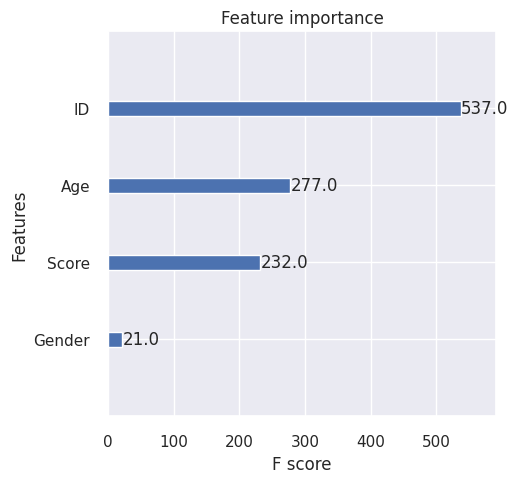

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x, y)

plt.rcParams['figure.figsize'] = (5, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [ ]:
sel_col = ['Income', 'Age', 'Score', 'Gender']
x = train[sel_col]
y = train.K_Means

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split, cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.83      1.00      0.91        10
           2       0.96      1.00      0.98        22
           3       1.00      0.91      0.96        35
           4       0.91      0.91      0.91        22

    accuracy                           0.93       128
   macro avg       0.92      0.94      0.93       128
weighted avg       0.93      0.93      0.93       128



<Axes: >

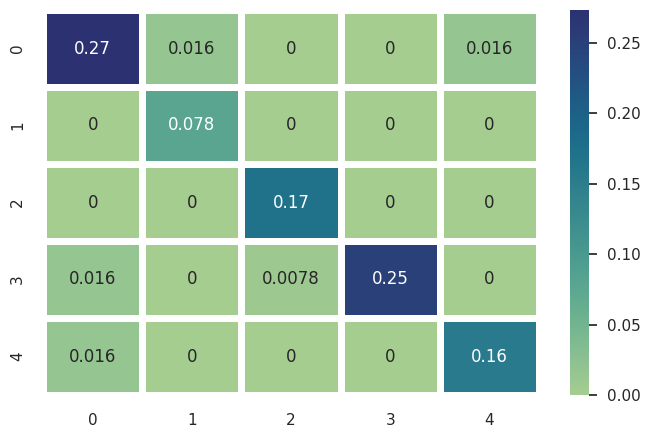

In [ ]:

log_reg = LogisticRegression() # ----------------------------------------------- Instantiate the algorithm

log_reg.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to create a model
train_pred = log_reg.predict(xtrain) # ----------------------------------------- Cros validate the model
print(classification_report(train_pred, ytrain)) # ----------------------------- View the classification metrics of the model

revealer = confusion_matrix(train_pred, ytrain)
plt.figure(figsize = (8,5))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        22

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



<Axes: >

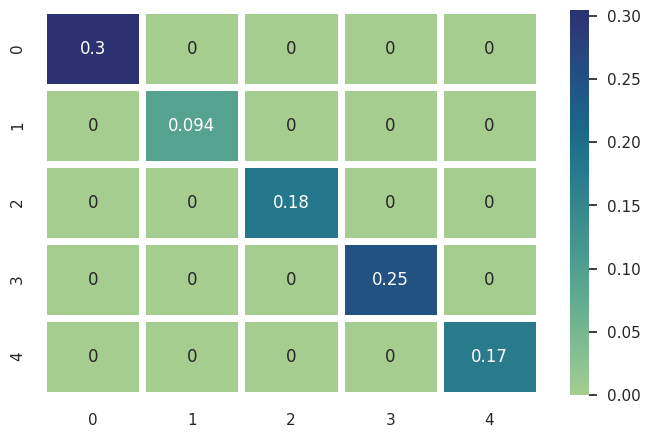

In [ ]:

tree = DecisionTreeClassifier() # ----------------------------------------------- Instantiate the algorithm

tree.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to create a model
train_pred = tree.predict(xtrain) # ----------------------------------------- Cros validate the model
print(classification_report(train_pred, ytrain)) # ----------------------------- View the classification metrics of the model

revealer = confusion_matrix(train_pred, ytrain)
plt.figure(figsize = (8,5))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [ ]:
confusion_matrix(train_pred, ytrain)

array([[19,  0,  0,  1,  0],
       [ 0, 29,  1,  0,  0],
       [ 0,  1, 30,  0,  0],
       [ 1,  0,  0, 33,  2],
       [ 0,  0,  0,  0, 11]])

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8
           4       0.33      1.00      0.50         1

    accuracy                           0.88        32
   macro avg       0.67      0.73      0.66        32
weighted avg       0.98      0.88      0.91        32



<Axes: >

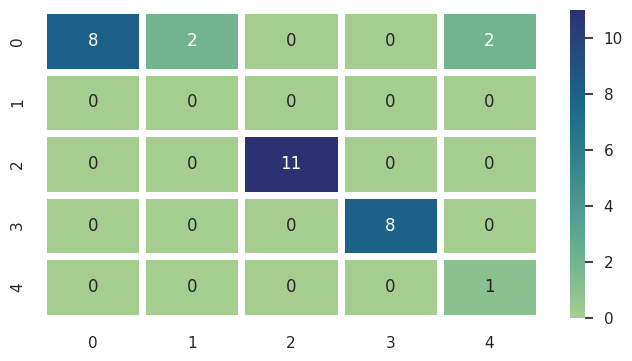

In [ ]:
# trying on test data
test_pred = log_reg.predict(xtest)
print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (8,4))
sns.set(style = 'darkgrid')
sns.heatmap(revealer, annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         8
           4       0.67      1.00      0.80         2

    accuracy                           0.97        32
   macro avg       0.93      0.98      0.95        32
weighted avg       0.98      0.97      0.97        32



<Axes: >

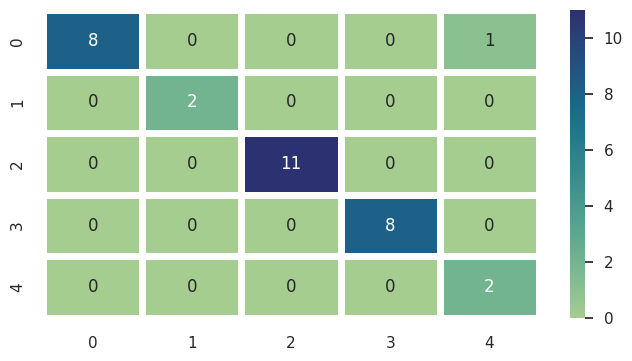

In [ ]:
# trying on test data
test_pred = tree.predict(xtest)
print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (8,4))
sns.set(style = 'darkgrid')
sns.heatmap(revealer, annot=True, cmap='crest', linewidth=5)

In [ ]:
# importing the test and carrying out the same process on it.
test_data = pd.read_csv('/content/TestData.csv')
test_data.head(3)

,Unnamed: 0,ID,Gender,Age,Income,Score,K_Means
0,76,77,Female,45,54,53,md_inc and mid
1,82,83,Male,67,54,41,md_inc and mid
2,90,91,Female,68,59,55,md_inc and mid


In [ ]:
transformer(test_data)

In [ ]:
test_data.drop('Unnamed: 0',  axis = 1)

,ID,Gender,Age,Income,Score,K_Means
0,-0.570833,0,0.390354,-0.400775,0.148553,3
1,-0.451910,1,1.937704,-0.400775,-0.350087,3
2,-0.293345,0,2.008038,-0.147920,0.231660,3
3,-0.432089,0,0.460688,-0.400775,-0.225427,3
4,1.431048,1,-0.875659,1.318637,0.813408,0
5,0.816609,1,0.601356,0.762357,-0.557854,0
6,-0.134780,1,0.601356,-0.046778,-0.308534,3
7,-1.264554,1,-1.086662,-1.209909,1.769136,2
8,0.895891,1,0.249686,0.812928,-1.347369,0
9,-1.343837,0,-0.664657,-1.412193,0.979621,2


In [ ]:
sel_cols = ['Income', 'Age', 'Score', 'Gender']
test_data_x = test_data[sel_cols]
test_data_y = test_data['K_Means']

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       1.00      1.00      1.00         1
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00        10
           4       0.67      0.80      0.73         5

    accuracy                           0.93        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.93      0.93      0.93        40



<Axes: >

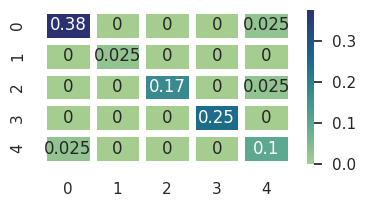

In [ ]:
new_pred = log_reg.predict(test_data_x)
print(classification_report(new_pred, test_data_y))

revealer = confusion_matrix(new_pred, test_data_y)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.50      0.67         2
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00        10
           4       0.83      1.00      0.91         5

    accuracy                           0.95        40
   macro avg       0.95      0.88      0.90        40
weighted avg       0.96      0.95      0.95        40



<Axes: >

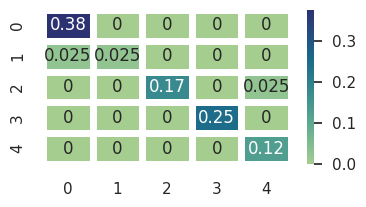

In [ ]:
new_pred = tree.predict(test_data_x)
print(classification_report(new_pred, test_data_y))

revealer = confusion_matrix(new_pred, test_data_y)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)